Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

df_stations = pd.read_csv('df_stations.csv')
df_pois = pd.read_csv('df_pois.csv')

df_combined = df_stations.head(10).merge(df_pois, how='cross')
df_combined.head()

,name_x,latitude_x,longitude_x,free_bikes,empty_slots,name_y,category,category_group,latitude_y,longitude_y,distance,address,region,fsq_category_id,category_type
0,Argenson - Château,48.888559,2.2642,10,15,Papelli,pizzeria,other,48.871671,2.356960,266,"61 rue du Faubourg Saint-Martin, 75010 Paris",Île-de-France,4bf58dd8d48988d1ca941735,other
1,Argenson - Château,48.888559,2.2642,10,15,Pâtisserie Tholoniat,dessert shop,other,48.871834,2.356693,284,54-56 rue du Château d'Eau (Rue du faubourg Sa...,Île-de-France,4bf58dd8d48988d1d0941735,other
2,Argenson - Château,48.888559,2.2642,10,15,New Dehli,indian restaurant,restaurant,48.871066,2.356008,349,"4 Passage Brady, 75010 Paris",Île-de-France,4bf58dd8d48988d10f941735,restaurant
3,Argenson - Château,48.888559,2.2642,10,15,BMK Paris-Bamako,african restaurant,restaurant,48.874646,2.356549,416,"14 rue de la Fidélité, 75010 Paris",Île-de-France,4bf58dd8d48988d1c8941735,restaurant
4,Argenson - Château,48.888559,2.2642,10,15,Boulangerie Julhès,bakery,other,48.872290,2.354474,447,"56 rue du Faubourg Saint-Denis, 75010 Paris",Île-de-France,4bf58dd8d48988d16a941735,bakery


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
grouped = df_combined.groupby('category_type')[['free_bikes', 'empty_slots']].sum().reset_index()
print(grouped)

  category_type  free_bikes  empty_slots
0        bakery          80          213
1           bar         480         1278
2         other        2000         5325
3    restaurant        1440         3834


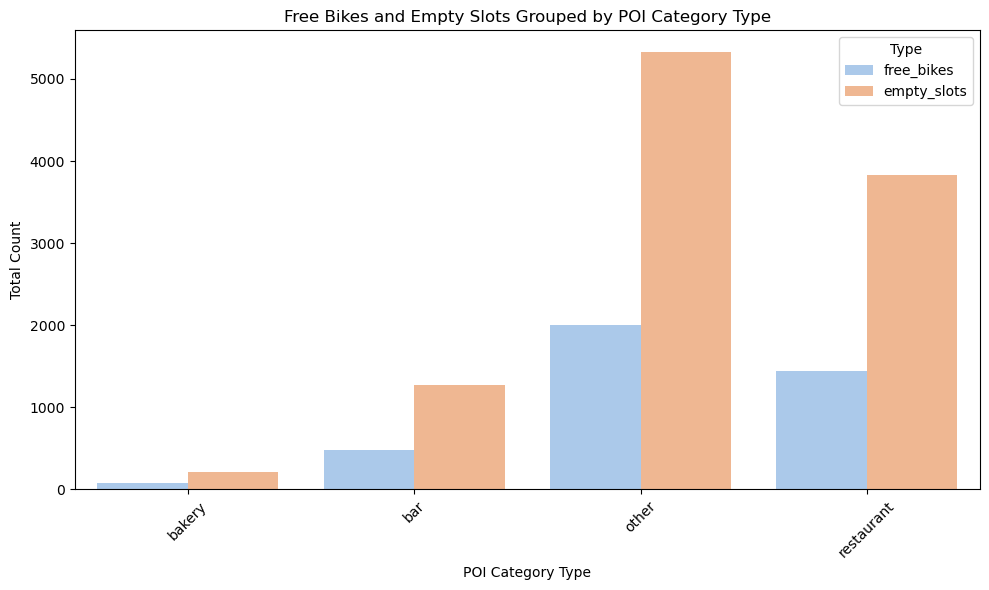

In [4]:
# Melt for side-by-side bar chart
melted = pd.melt(grouped, id_vars='category_type',
                 value_vars=['free_bikes', 'empty_slots'],
                 var_name='Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='category_type', y='Count', hue='Type', data=melted, palette='pastel')
plt.title('Free Bikes and Empty Slots Grouped by POI Category Type')
plt.xlabel('POI Category Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualized bar chart showed that there were more empty slots than free bikes around the places of interest. It is interesting to know that the "other" class consists of categories like supermarkets, gyms, places of worship, etc, hence why it had more free bikes and empty slots. Even so, its values for the free bikes classification was comparable to that of the restaurant category. It is likely that there is need for more bike stations to be sited close to the restaurants.

In [7]:
# Create distance bins
bins = [0, 250, 500, 750, 1000]
labels = ['0-250m', '251-500m', '501-750m', '751-1000m']
df_combined['distance_bin'] = pd.cut(df_combined['distance'], bins=bins, labels=labels)
grouped = df_combined.groupby(['category_type', 'distance_bin'])[['free_bikes', 'empty_slots']].sum().reset_index()
print(grouped.head())

  category_type distance_bin  free_bikes  empty_slots
0        bakery       0-250m           0            0
1        bakery     251-500m          80          213
2        bakery     501-750m           0            0
3        bakery    751-1000m           0            0
4           bar       0-250m           0            0


C:\Users\Nelson\AppData\Local\Temp\ipykernel_24176\4268071655.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_combined.groupby(['category_type', 'distance_bin'])[['free_bikes', 'empty_slots']].sum().reset_index()


C:\Users\Nelson\AppData\Local\Temp\ipykernel_24176\1841449415.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='distance_bin', y='Count', hue='Type',


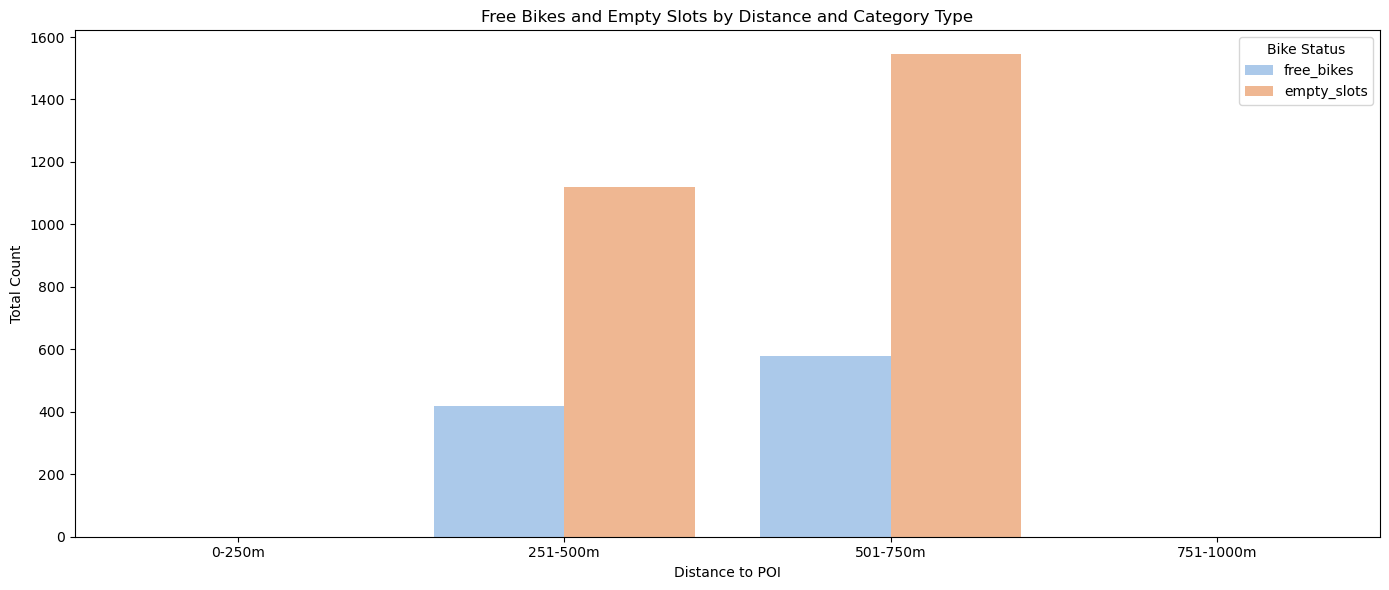

In [8]:
melted = pd.melt(grouped,
                 id_vars=['category_type', 'distance_bin'],
                 value_vars=['free_bikes', 'empty_slots'],
                 var_name='Type', value_name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(x='distance_bin', y='Count', hue='Type',
            data=melted, palette='pastel', ci=None)

plt.title('Free Bikes and Empty Slots by Distance and Category Type')
plt.xlabel('Distance to POI')
plt.ylabel('Total Count')
plt.legend(title='Bike Status')
plt.tight_layout()
plt.show()

When distance was added to the visualization, it was revealed that there was no bike station within the two extreme distances of 0-25m and 751-1000m. There were more empty slots and free bikes in the distance class of 501-750m. This could be because they are within reachable distance. For instance, users may consider 0-250m a walking and moving distance while some may consider 751-1000m quite a distance to cover.

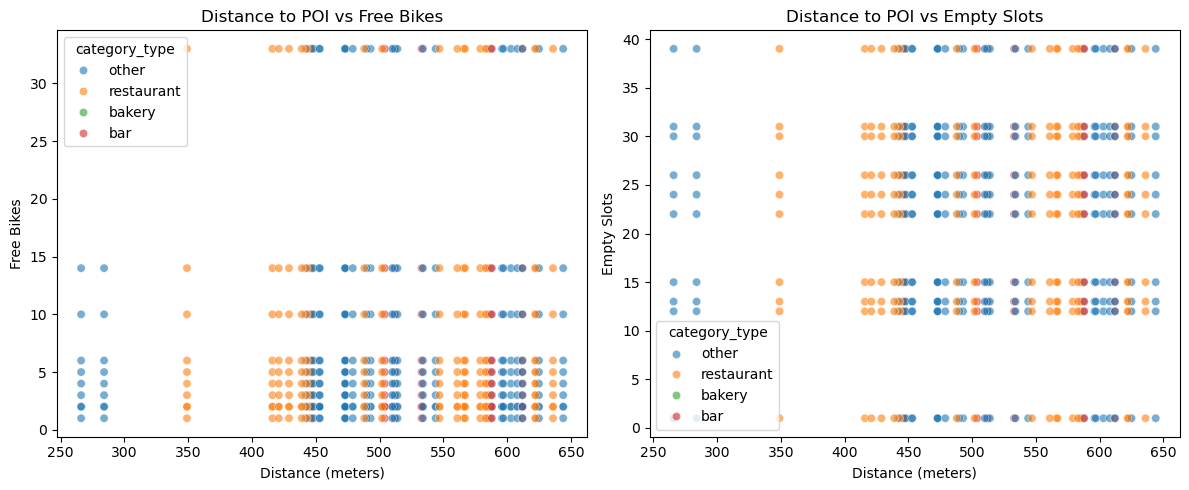

In [9]:
plt.figure(figsize=(12, 5))

# Scatterplot: Distance vs Free Bikes
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_combined, x='distance', y='free_bikes', hue='category_type', alpha=0.6)
plt.title('Distance to POI vs Free Bikes')
plt.xlabel('Distance (meters)')
plt.ylabel('Free Bikes')

# Scatterplot: Distance vs Empty Slots
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_combined, x='distance', y='empty_slots', hue='category_type', alpha=0.6)
plt.title('Distance to POI vs Empty Slots')
plt.xlabel('Distance (meters)')
plt.ylabel('Empty Slots')

plt.tight_layout()
plt.show()

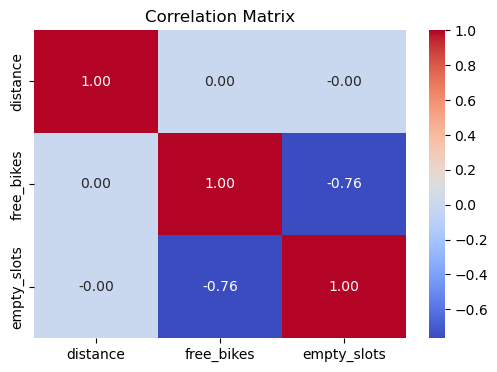

In [10]:
corr_matrix = df_combined[['distance', 'free_bikes', 'empty_slots']].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix showed that both free bikes and empty slots did not correlate with distance.

In [22]:
# Sort by free_bikes first, then empty_slots (both descending)
sorted_stations = df_combined.sort_values(by=['free_bikes', 'empty_slots'], ascending=[False, False])

# Display top results
print(sorted_stations[['name_x', 'free_bikes', 'empty_slots']])

                                 name_x  free_bikes  empty_slots
300  Champs de Manoeuvre - Cartoucherie          33            1
301  Champs de Manoeuvre - Cartoucherie          33            1
302  Champs de Manoeuvre - Cartoucherie          33            1
303  Champs de Manoeuvre - Cartoucherie          33            1
304  Champs de Manoeuvre - Cartoucherie          33            1
..                                  ...         ...          ...
295         Pernety - Raymond Losserand           1           31
296         Pernety - Raymond Losserand           1           31
297         Pernety - Raymond Losserand           1           31
298         Pernety - Raymond Losserand           1           31
299         Pernety - Raymond Losserand           1           31

[500 rows x 3 columns]


In [24]:
max_bike_station = df_combined.loc[df_combined['free_bikes'].idxmax()]
station_name = max_bike_station['name_x']
station_lat = max_bike_station['latitude_x']
station_lon = max_bike_station['longitude_x']

print(f"Station with most free bikes: {station_name} ({max_bike_station['free_bikes']} bikes)")

Station with most free bikes: Champs de Manoeuvre - Cartoucherie (33 bikes)


In [27]:
# Filter rows matching the station with max free bikes
poi_near_max_station = df_combined[(df_combined['name_x'] == station_name) & (df_combined['distance'])]

# Count how many POIs are nearby
num_pois = poi_near_max_station.shape[0]
print(f"Number of POIs within 500m of {station_name}: {num_pois}")

Number of POIs within 500m of Champs de Manoeuvre - Cartoucherie: 25


In [ ]:
top_stations = df_combined.groupby('name_x')['free_bikes'].max().sort_values(ascending=False).head(5).index.tolist()

top_df = df_combined[df_combined['name_x'].isin(top_stations)]

poi_counts = top_df.groupby(['name_x', 'category_type']).size().reset_index(name='poi_count')

poi_pivot = poi_counts.pivot(index='name_x', columns='category_type', values='poi_count').fillna(0).astype(int)

print(poi_pivot)

category_type                       bakery  bar  other  restaurant
name_x                                                            
Argenson - Château                       1    6     25          18
Champs de Manoeuvre - Cartoucherie       1    6     25          18
Mairie de Rosny-sous-Bois                1    6     25          18
Saint Lambert - Blomet                   1    6     25          18
Saint-Maur - République                  1    6     25          18


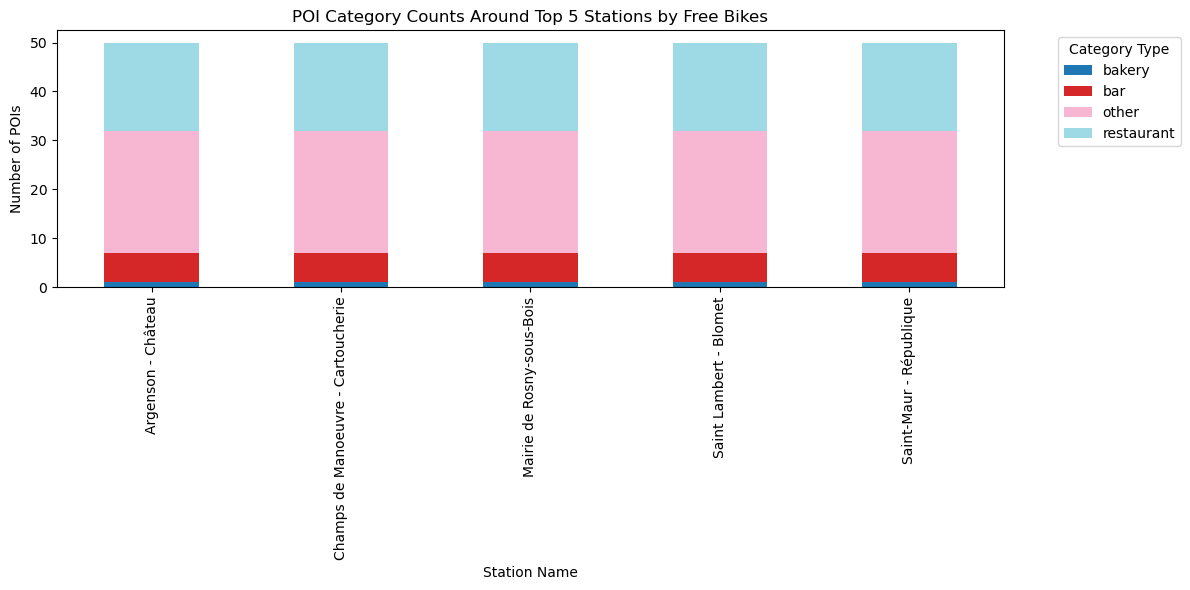

In [29]:
# Plot as stacked bar chart
poi_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('POI Category Counts Around Top 5 Stations by Free Bikes')
plt.xlabel('Station Name')
plt.ylabel('Number of POIs')
plt.legend(title='Category Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
import sqlite3
import os
os.makedirs("C:/Users/Nelson/Lighthouse_Final_Project_Python/Statistical-Modelling-Project/data/SQLite3 database", exist_ok=True)
db_path = os.path.join("C:/Users/Nelson/Lighthouse_Final_Project_Python/Statistical-Modelling-Project/data/SQLite3 database", "bike_stations_analysis.db")
conn = sqlite3.connect(db_path)

In [44]:
# Save main combined dataframe
df_combined.to_sql("combined_data", conn, if_exists="replace", index=False)
df_stations.to_sql("stations", conn, if_exists="replace", index=False)
df_pois.to_sql("pois", conn, if_exists="replace", index=False)
grouped.to_sql("grouped_data", conn, if_exists="replace", index=False)
poi_pivot.to_sql("poi_pivot", conn, if_exists="replace")

5

In [ ]:
import pandas as pd

query = """
SELECT name_x AS name, distance, category_type, empty_slots
FROM combined_data
ORDER BY category_type DESC
"""
summary = pd.read_sql_query(query, conn)
print(summary)

                                   name  distance category_type  empty_slots
0                    Argenson - Château       349    restaurant           15
1                    Argenson - Château       416    restaurant           15
2                    Argenson - Château       429    restaurant           15
3                    Argenson - Château       421    restaurant           15
4                    Argenson - Château       443    restaurant           15
..                                  ...       ...           ...          ...
495         Pernety - Raymond Losserand       447        bakery           31
496  Champs de Manoeuvre - Cartoucherie       447        bakery            1
497             Belleville - Télégraphe       447        bakery           39
498   Abbeville - Faubourg Poissonnière       447        bakery           12
499                    Porte de Pantin.       447        bakery           26

[500 rows x 4 columns]


In [48]:
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [50]:
print("Bike Station Data (Before Join):")
print(df_stations.head(5))

print("\nPOI Data (Before Join):")
print(df_pois.head(5))

Bike Station Data (Before Join):
                                name   latitude  longitude  free_bikes  \
0                 Argenson - Château  48.888559   2.264200          10   
1             Saint Lambert - Blomet  48.836591   2.293056           5   
2            Saint-Maur - République  48.864186   2.378317           6   
3          Mairie de Rosny-sous-Bois  48.871257   2.486581          14   
4  Mouton Duvernet - Général Leclerc  48.831633   2.329312           4   

   empty_slots  
0           15  
1           22  
2           30  
3           13  
4           24  

POI Data (Before Join):
                   name            category category_group   latitude  \
0               Papelli            pizzeria          other  48.871671   
1  Pâtisserie Tholoniat        dessert shop          other  48.871834   
2             New Dehli   indian restaurant     restaurant  48.871066   
3      BMK Paris-Bamako  african restaurant     restaurant  48.874646   
4    Boulangerie Julhès       

In [ ]:
print("Unique station names in bike data:", df_stations['name'].nunique())
print("Unique station names in POI data:", df_pois['name'].nunique())


Unique station names in bike data: 1450
Unique station names in POI data: 50


In [ ]:
print("Rows in bike data:", df_stations.shape[0])
print("Rows in POI data:", df_pois.shape[0])

Rows in bike data: 1453
Rows in POI data: 50


In [60]:
df_combined2 = pd.merge(df_stations, df_pois, how='cross')
df_combined2.head()

,name_x,latitude_x,longitude_x,free_bikes,empty_slots,name_y,category,category_group,latitude_y,longitude_y,distance,address,region,fsq_category_id,category_type
0,Argenson - Château,48.888559,2.2642,10,15,Papelli,pizzeria,other,48.871671,2.356960,266,"61 rue du Faubourg Saint-Martin, 75010 Paris",Île-de-France,4bf58dd8d48988d1ca941735,other
1,Argenson - Château,48.888559,2.2642,10,15,Pâtisserie Tholoniat,dessert shop,other,48.871834,2.356693,284,54-56 rue du Château d'Eau (Rue du faubourg Sa...,Île-de-France,4bf58dd8d48988d1d0941735,other
2,Argenson - Château,48.888559,2.2642,10,15,New Dehli,indian restaurant,restaurant,48.871066,2.356008,349,"4 Passage Brady, 75010 Paris",Île-de-France,4bf58dd8d48988d10f941735,restaurant
3,Argenson - Château,48.888559,2.2642,10,15,BMK Paris-Bamako,african restaurant,restaurant,48.874646,2.356549,416,"14 rue de la Fidélité, 75010 Paris",Île-de-France,4bf58dd8d48988d1c8941735,restaurant
4,Argenson - Château,48.888559,2.2642,10,15,Boulangerie Julhès,bakery,other,48.872290,2.354474,447,"56 rue du Faubourg Saint-Denis, 75010 Paris",Île-de-France,4bf58dd8d48988d16a941735,bakery


In [62]:
print("Combined Data (After Join):")
print(df_combined2.head())

print("Number of rows after join:", df_combined2.shape[0])
print("Number of columns after join:", df_combined2.shape[1])

Combined Data (After Join):
               name_x  latitude_x  longitude_x  free_bikes  empty_slots  \
0  Argenson - Château   48.888559       2.2642          10           15   
1  Argenson - Château   48.888559       2.2642          10           15   
2  Argenson - Château   48.888559       2.2642          10           15   
3  Argenson - Château   48.888559       2.2642          10           15   
4  Argenson - Château   48.888559       2.2642          10           15   

                 name_y            category category_group  latitude_y  \
0               Papelli            pizzeria          other   48.871671   
1  Pâtisserie Tholoniat        dessert shop          other   48.871834   
2             New Dehli   indian restaurant     restaurant   48.871066   
3      BMK Paris-Bamako  african restaurant     restaurant   48.874646   
4    Boulangerie Julhès              bakery          other   48.872290   

   longitude_y  distance                                            address 

In [65]:
unmatched_bikes = df_stations[~df_stations['name'].isin(df_combined2['name_x'])]
print("Unmatched bike stations (not joined):")
print(unmatched_bikes)

Unmatched bike stations (not joined):
Empty DataFrame
Columns: [name, latitude, longitude, free_bikes, empty_slots]
Index: []


In [66]:
unmatched_poi = df_pois[~df_pois['name'].isin(df_combined2['name_y'])]
print("Unmatched POIs (not joined):")
print(unmatched_poi)

Unmatched POIs (not joined):
Empty DataFrame
Columns: [name, category, category_group, latitude, longitude, distance, address, region, fsq_category_id, category_type]
Index: []


In [67]:
print("Rows before join (bike):", len(df_stations))
print("Rows before join (POI):", len(df_pois))
print("Rows after join:", len(df_combined2))

Rows before join (bike): 1453
Rows before join (POI): 50
Rows after join: 72650


In [68]:
df_check = pd.merge(df_stations, df_pois, on='name', how='outer', indicator=True)
print(df_check['_merge'].value_counts())

_merge
left_only     1453
right_only      50
both             0
Name: count, dtype: int64


In [ ]:
# Show number of missing values in each column
missing_values = df_combined2.isnull().sum()

missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
region    1453
dtype: int64


In [79]:
number_category = df_combined2['category_type'].value_counts()
number_category

category_type
other         36325
restaurant    26154
bar            8718
bakery         1453
Name: count, dtype: int64

In [83]:
df_combined2.to_csv('df_combined2.csv', index=False)